# Main For Part 3

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import numpy as np
from matplotlib import pyplot as plt
# Needed for training
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import random_split, DataLoader
from torch.utils.data.dataset import Subset
# Models
from models_part1 import FinalClassifier
from models_part3_testing import NTXentLoss,MnistSimCLR,Cifar10SimCLR
from models_testing import  plot_accuracies,plot_losses,test_classifier,test_classifyingAutoEncoder
from models_testing import create_model_folders,PretrainedModel,save_pretrained_model
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
base_path = 'trained_models/part_3/'

# MNIST

# Preparing Data

In [142]:
mnist_path = "./mnist_data"

train_transform = transforms.Compose([
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.MNIST(
    root=mnist_path,  
    train=True,       
    transform=train_transform,  # Apply train transformations
    download=True     
)

test_dataset = torchvision.datasets.MNIST(
    root=mnist_path,
    train=False,  
    transform=test_transform,  # Apply test transformations
    download=True
)

print("MNIST dataset downloaded successfully!")

MNIST dataset downloaded successfully!


In [143]:
train_size = 50_000
val_size = 10_000
batch_size = 128


train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

print(f"Train size: {len(train_dataset)}, Validation size: {len(val_dataset)}, Test size: {len(test_dataset)}")

# Create DataLoaders
mnist_train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
mnist_val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
mnist_test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("DataLoaders created successfully!")

# images, labels = next(iter(mnist_train_loader))
# print(f"Batch shape: {images.shape}, Labels: {labels[:5]}")

Train size: 50000, Validation size: 10000, Test size: 10000
DataLoaders created successfully!


# Experiment

In [144]:
model = MnistSimCLR(latent_dim=128,dropout_prob=0.1,temperature = 0.07).to(device)
train_losses,val_losses = model.train_autoencoder(train_loader= mnist_train_loader,
                       val_loader=mnist_val_loader,
                       num_epochs=40,
                       learning_rate=1e-3,
                       weight_decay= 1e-3)


Epoch [1/40], Time: 5.24s, Train Loss: 2.5496, Val Loss: 1.5261, LR: 0.001000
Epoch [2/40], Time: 5.41s, Train Loss: 1.8115, Val Loss: 1.7345, LR: 0.001000
Epoch [3/40], Time: 5.40s, Train Loss: 1.6195, Val Loss: 1.7388, LR: 0.001000
Epoch [4/40], Time: 5.41s, Train Loss: 1.5441, Val Loss: 1.6313, LR: 0.001000
Epoch [5/40], Time: 5.43s, Train Loss: 1.4770, Val Loss: 1.5277, LR: 0.001000
Epoch [6/40], Time: 5.41s, Train Loss: 1.4599, Val Loss: 2.4002, LR: 0.001000
Epoch [7/40], Time: 5.40s, Train Loss: 1.4142, Val Loss: 2.1475, LR: 0.000125
Epoch [8/40], Time: 5.38s, Train Loss: 1.3540, Val Loss: 2.4911, LR: 0.000125
Epoch [9/40], Time: 5.40s, Train Loss: 1.3386, Val Loss: 3.1033, LR: 0.000125
Epoch [10/40], Time: 5.39s, Train Loss: 1.3250, Val Loss: 2.4889, LR: 0.000125
Epoch [11/40], Time: 5.40s, Train Loss: 1.3190, Val Loss: 1.6541, LR: 0.000125
Epoch [12/40], Time: 5.41s, Train Loss: 1.3206, Val Loss: 2.4939, LR: 0.000125
Epoch [13/40], Time: 5.40s, Train Loss: 1.3367, Val Loss: 2.2

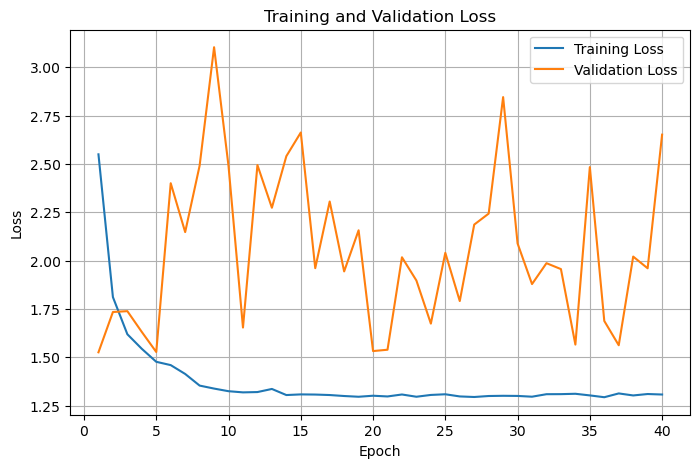

In [145]:
plot_losses(train_losses = train_losses, val_losses = val_losses)

In [146]:
pretrained_encoder = model.encoder
for param in pretrained_encoder.parameters():
    param.requires_grad = False  # Ensure encoder is frozen
classifier = FinalClassifier(latent_dim=128)
train_losses, train_accuracies, val_accuracies = classifier.fit_classifier(encoder = pretrained_encoder,
                                                                           train_loader =  mnist_train_loader,
                                                                           val_loader = mnist_val_loader,
                                                                           num_epochs=30, 
                                                                           learning_rate=1e-4)


Epoch [1/30], Time: 3.80s, Train Loss: 0.5299, Train Accuracy: 85.83%, Val Accuracy: 94.19%, LR: 0.000100
Epoch [2/30], Time: 3.76s, Train Loss: 0.2253, Train Accuracy: 93.99%, Val Accuracy: 95.84%, LR: 0.000100
Epoch [3/30], Time: 3.85s, Train Loss: 0.1629, Train Accuracy: 95.46%, Val Accuracy: 96.61%, LR: 0.000100
Epoch [4/30], Time: 3.89s, Train Loss: 0.1308, Train Accuracy: 96.32%, Val Accuracy: 97.08%, LR: 0.000100
Epoch [5/30], Time: 3.92s, Train Loss: 0.1126, Train Accuracy: 96.60%, Val Accuracy: 97.36%, LR: 0.000100
Epoch [6/30], Time: 3.90s, Train Loss: 0.1004, Train Accuracy: 96.94%, Val Accuracy: 97.38%, LR: 0.000100
Epoch [7/30], Time: 3.86s, Train Loss: 0.0929, Train Accuracy: 97.16%, Val Accuracy: 97.67%, LR: 0.000100
Epoch [8/30], Time: 3.87s, Train Loss: 0.0889, Train Accuracy: 97.24%, Val Accuracy: 97.73%, LR: 0.000100
Epoch [9/30], Time: 3.90s, Train Loss: 0.0815, Train Accuracy: 97.37%, Val Accuracy: 97.85%, LR: 0.000100
Epoch [10/30], Time: 3.84s, Train Loss: 0.0769

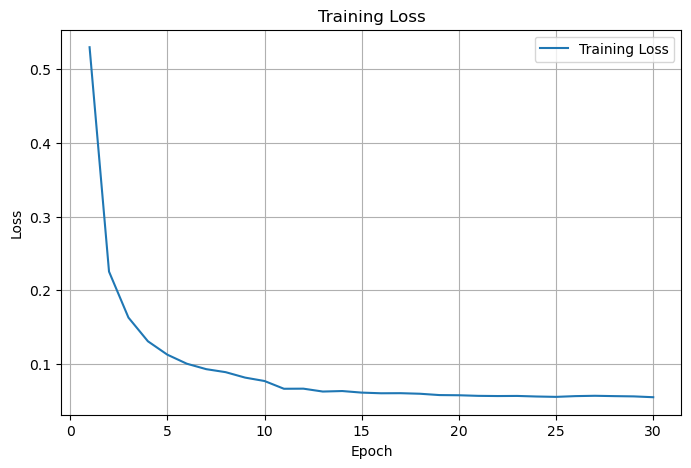

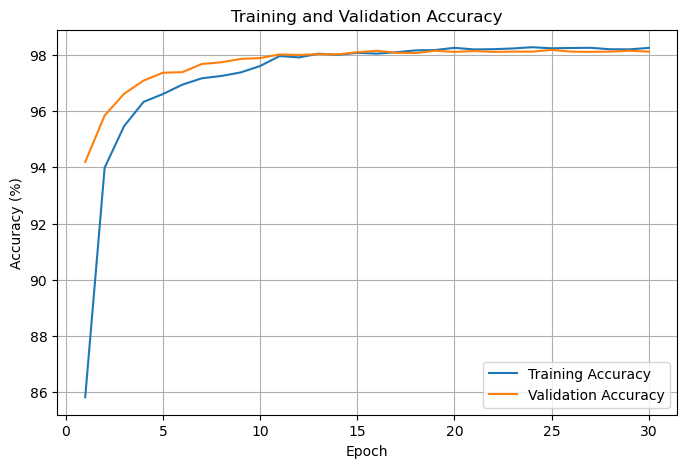

In [147]:
plot_losses(train_losses)
plot_accuracies(train_accuracies, val_accuracies)

In [148]:
test_classifier(encoder=pretrained_encoder,
                classifier=classifier,
                test_loader=mnist_test_loader)

Test Accuracy: 98.29%


98.29

## Saving model

In [11]:
save_pretrained_model(path = base_path + 'mnist.pth',
                      encoder = model.encoder,
                      classifier = classifier,
                      decoder = None)

# Cifar10

# Preparing data

In [63]:
cifar10_path = "./cifar10_data"

train_transform = transforms.Compose([
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
])

c10_full_train_dataset = torchvision.datasets.CIFAR10(
    root=cifar10_path,  
    train=True,       
    transform=train_transform,
    download=True     
)

c10_test_dataset = torchvision.datasets.CIFAR10(
    root=cifar10_path,
    train=False,  
    transform=test_transform,
    download=True
)

print("CIFAR-10 dataset downloaded successfully!")

Files already downloaded and verified
Files already downloaded and verified
CIFAR-10 dataset downloaded successfully!


In [118]:
train_size = 40_000
val_size = 10_000
batch_size = 128

c10_train_dataset, c10_val_dataset = random_split(c10_full_train_dataset, [train_size, val_size])

# Check dataset sizes
print(f"Train size: {len(c10_train_dataset)}, Validation size: {len(c10_val_dataset)}, Test size: {len(c10_test_dataset)}")



# Create DataLoaders
c10_train_loader = DataLoader(c10_train_dataset, batch_size=batch_size, shuffle=True)
c10_val_loader = DataLoader(c10_val_dataset, batch_size=batch_size, shuffle=False)
c10_test_loader = DataLoader(c10_test_dataset, batch_size=batch_size, shuffle=False)

print("DataLoaders created successfully!")

# Get a batch of images and labels from the train_loader
images, labels = next(iter(c10_train_loader))
print(f"Batch shape: {images.shape}, Labels (first 5): {labels[:5]}")

Train size: 40000, Validation size: 10000, Test size: 10000
DataLoaders created successfully!
Batch shape: torch.Size([128, 3, 32, 32]), Labels (first 5): tensor([7, 4, 2, 4, 3])


# Experiment

In [134]:
model = Cifar10SimCLR(latent_dim=128,
                      dropout_prob=0.1,
                      temperature=0.07).to(device)
train_losses,val_losses = model.train_autoencoder(train_loader = c10_train_loader,
                        val_loader = c10_val_loader,
                        num_epochs=60,
                        learning_rate=1e-3,
                        weight_decay= 1e-3)

Initializing weights ....
Initializing weights DONE
Epoch [1/60], Time: 5.88s, Train Loss: 2.1186, Val Loss: 1.1536, LR: 0.001000
Epoch [2/60], Time: 5.67s, Train Loss: 1.7489, Val Loss: 1.1499, LR: 0.001000
Epoch [3/60], Time: 5.68s, Train Loss: 1.6152, Val Loss: 1.1478, LR: 0.001000
Epoch [4/60], Time: 5.65s, Train Loss: 1.5690, Val Loss: 1.1447, LR: 0.001000
Epoch [5/60], Time: 5.64s, Train Loss: 1.5474, Val Loss: 1.1791, LR: 0.001000
Epoch [6/60], Time: 5.66s, Train Loss: 1.4687, Val Loss: 1.1324, LR: 0.001000
Epoch [7/60], Time: 5.68s, Train Loss: 1.4565, Val Loss: 1.1427, LR: 0.001000
Epoch [8/60], Time: 5.62s, Train Loss: 1.4267, Val Loss: 1.1323, LR: 0.001000
Epoch [9/60], Time: 5.68s, Train Loss: 1.4114, Val Loss: 1.1437, LR: 0.001000
Epoch [10/60], Time: 5.73s, Train Loss: 1.4047, Val Loss: 1.1352, LR: 0.001000
Epoch [11/60], Time: 5.70s, Train Loss: 1.3878, Val Loss: 1.1476, LR: 0.001000
Epoch [12/60], Time: 5.66s, Train Loss: 1.3764, Val Loss: 1.1308, LR: 0.001000
Epoch [13

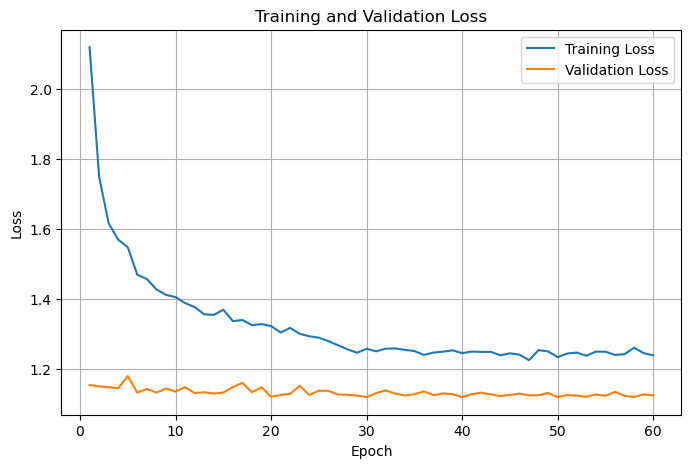

In [135]:
plot_losses(train_losses = train_losses, val_losses = val_losses)

In [136]:
for param in model.encoder.parameters():
    param.requires_grad = False  # Ensure encoder is frozen
pretrained_encoder = model.encoder
classifier = FinalClassifier(latent_dim=128)
train_losses, train_accuracies, val_accuracies = classifier.fit_classifier(encoder = pretrained_encoder,
                                                                           train_loader = c10_train_loader,
                                                                           val_loader = c10_val_loader,
                                                                           num_epochs=40, 
                                                                           learning_rate=1e-3)

Epoch [1/40], Time: 4.26s, Train Loss: 1.2266, Train Accuracy: 56.88%, Val Accuracy: 63.37%, LR: 0.001000
Epoch [2/40], Time: 4.26s, Train Loss: 1.0850, Train Accuracy: 61.91%, Val Accuracy: 65.13%, LR: 0.001000
Epoch [3/40], Time: 4.11s, Train Loss: 1.0344, Train Accuracy: 63.61%, Val Accuracy: 65.38%, LR: 0.001000
Epoch [4/40], Time: 4.25s, Train Loss: 1.0000, Train Accuracy: 64.86%, Val Accuracy: 66.03%, LR: 0.001000
Epoch [5/40], Time: 4.15s, Train Loss: 0.9742, Train Accuracy: 65.69%, Val Accuracy: 66.74%, LR: 0.001000
Epoch [6/40], Time: 4.20s, Train Loss: 0.9470, Train Accuracy: 66.55%, Val Accuracy: 67.19%, LR: 0.001000
Epoch [7/40], Time: 4.23s, Train Loss: 0.9307, Train Accuracy: 67.17%, Val Accuracy: 67.26%, LR: 0.001000
Epoch [8/40], Time: 4.26s, Train Loss: 0.9145, Train Accuracy: 67.33%, Val Accuracy: 67.37%, LR: 0.001000
Epoch [9/40], Time: 4.21s, Train Loss: 0.8994, Train Accuracy: 68.08%, Val Accuracy: 67.48%, LR: 0.001000
Epoch [10/40], Time: 4.18s, Train Loss: 0.8861

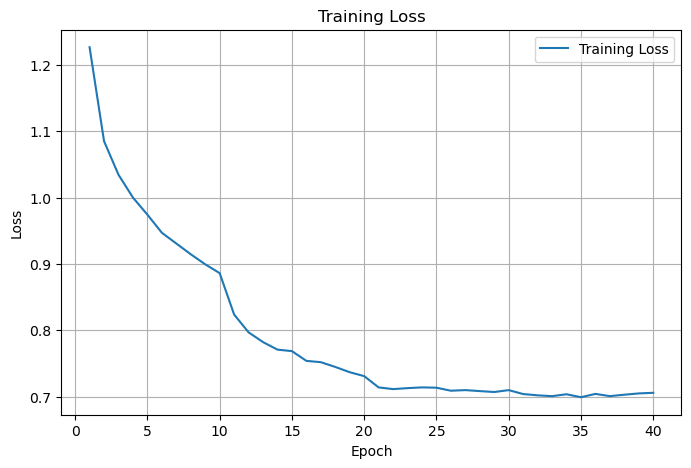

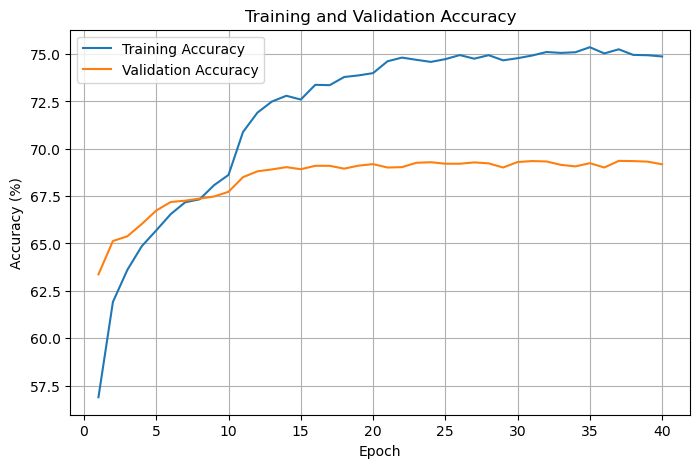

In [137]:
plot_losses(train_losses)
plot_accuracies(train_accuracies, val_accuracies)

In [138]:
test_classifier(encoder=pretrained_encoder,
                classifier=classifier,
                test_loader=c10_test_loader)

Test Accuracy: 68.72%


68.72

## Saving model

In [27]:
save_pretrained_model(path = base_path + 'cifar.pth',
                      encoder = model.encoder,
                      classifier = classifier,
                      decoder = None)